# Palatalization, /j/, and rhyme

## Description

/j/ can rhyme with any palatalized consonant, e.g., /MiNA/ ~ /iJA/ (меня ~ и я), but palatalized consonants do not automatically rhyme with one another. That is, rhymes of this type are not transitive; if A rhymes with B and A rhymes with C, it is not possible to conclude that B rhymes with C.

To address this problem we artificially adjust the values of palatalized consonants to reduce their distance from /j/. We do this by treating them like sequences of C + /j/, e.g., palatalized /l′/ is rewritten as /lj/. Because our general methods treat consonant clusters as averages of their features values, this strategy has the effect of incorporating some properties of averaging the property values of the consonant with those of /j/.

## Import libraries

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(color_codes=True)

## Prepare data

In [2]:
df = pd.DataFrame([
    ["j",0,0,1,0,1,1,0,1,1,0,0],
    ["l",0,1,1,1,1,0,0,1,1,1,0],
    ["l′",0,1,1,1,1,1,0,1,1,1,0],
    ["lj",0,0.5,1,0.5,1,0.5,0,1,1,0.5,0],
    ["n",0,1,1,1,1,0,1,1,0,0,0],
    ["n′",0,1,1,1,1,1,1,1,0,0,0],
    ["nj",0,0.5,1,0.5,1,0.5,0.5,1,0.5,0,0]
])
df.columns = ["Segment", "Syllabic", "Consonantal", "Sonorant", "Anterior", "Coronal", "Palatalized",
             "Nasal", "Voiced", "Continuant", "Lateral", "Delayed"]
df.set_index("Segment", inplace=True)
df

,Syllabic,Consonantal,Sonorant,Anterior,Coronal,Palatalized,Nasal,Voiced,Continuant,Lateral,Delayed
Segment,,,,,,,,,,,
j,0,0.0,1,0.0,1,1.0,0.0,1,1.0,0.0,0
l,0,1.0,1,1.0,1,0.0,0.0,1,1.0,1.0,0
l′,0,1.0,1,1.0,1,1.0,0.0,1,1.0,1.0,0
lj,0,0.5,1,0.5,1,0.5,0.0,1,1.0,0.5,0
n,0,1.0,1,1.0,1,0.0,1.0,1,0.0,0.0,0
n′,0,1.0,1,1.0,1,1.0,1.0,1,0.0,0.0,0
nj,0,0.5,1,0.5,1,0.5,0.5,1,0.5,0.0,0


## Plot all data, including integral (non-decomposed) palatalized consonants

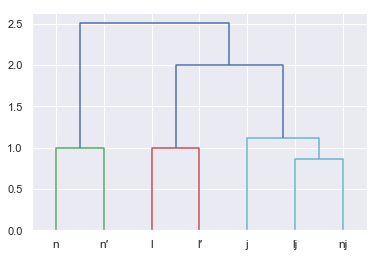

In [3]:
l = linkage(df, method="ward")
labelList = list(df.index) # segments
plt.figure(figsize=(6, 4))
dendrogram(l, labels=labelList)
plt.show()

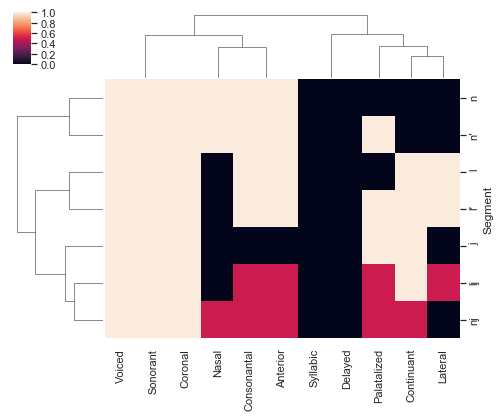

In [4]:
g = sns.clustermap(df, method="ward", figsize=(8,6))
plt.show()

## Plot the same without the integral palatalized consonants

In [5]:
if "l′" in df.index: # dodge error if rerunning after already dropped
    df.drop(["l′", "n′"], inplace=True)
df

,Syllabic,Consonantal,Sonorant,Anterior,Coronal,Palatalized,Nasal,Voiced,Continuant,Lateral,Delayed
Segment,,,,,,,,,,,
j,0,0.0,1,0.0,1,1.0,0.0,1,1.0,0.0,0
l,0,1.0,1,1.0,1,0.0,0.0,1,1.0,1.0,0
lj,0,0.5,1,0.5,1,0.5,0.0,1,1.0,0.5,0
n,0,1.0,1,1.0,1,0.0,1.0,1,0.0,0.0,0
nj,0,0.5,1,0.5,1,0.5,0.5,1,0.5,0.0,0


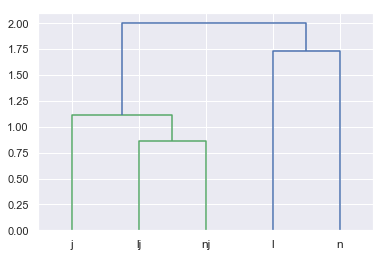

In [6]:
l = linkage(df, method="ward")
labelList = list(df.index) # segments
plt.figure(figsize=(6, 4))
dendrogram(l, labels=labelList)
plt.show()

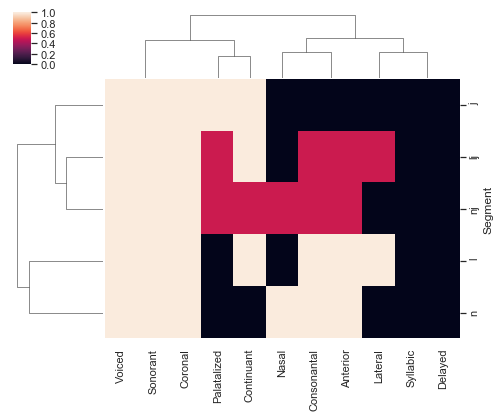

In [7]:
g = sns.clustermap(df, method="ward", figsize=(8,6))
plt.show()